Name: **PRIYA KULKARNI**

UTA ID: **1002088875**

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

path = "/content/drive/MyDrive/Pythonclass/Iris.csv"
df = pd.read_csv(path)

What are the dimensions (rows and columns) of the dataset?

In [52]:
df.shape

(150, 6)

In [53]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [54]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [55]:
df.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
133,134,6.3,2.8,5.1,1.5,Iris-virginica
12,13,4.8,3.0,1.4,0.1,Iris-setosa
58,59,6.6,2.9,4.6,1.3,Iris-versicolor
16,17,5.4,3.9,1.3,0.4,Iris-setosa
134,135,6.1,2.6,5.6,1.4,Iris-virginica


What are the data types of each column?

In [56]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [57]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [58]:
df_new = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]

Are there any missing values in the dataset? If so, how many and in which columns?

In [59]:
df_new.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
dtype: int64

Are there any duplicate rows in the dataset? If yes, remove them.

In [60]:
df_new = df_new.drop_duplicates() # remove duplicates

What are the summary statistics (mean, median, min, max, etc.) for numerical columns?

In [61]:
df_new.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Are there any inconsistencies or anomalies in the data that need to be addressed (e.g.,
outliers, incorrect values)

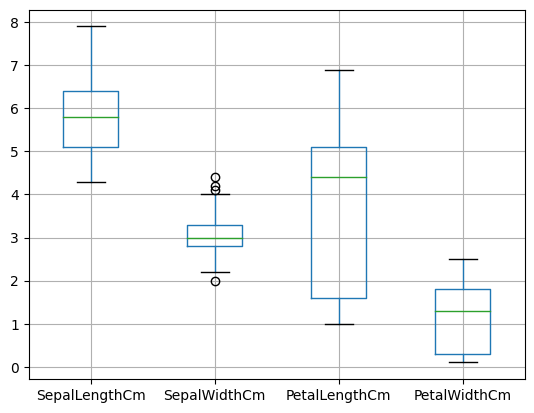

In [62]:
df_new.boxplot()
plt.show()

Handle missing values appropriately (e.g., imputation, removal, or other strategies).

In [63]:
df_new.fillna(df_new.mean(), inplace=True)

Visualize key insights using appropriate plots and charts (e.g., histograms, scatter plots, box
plots)

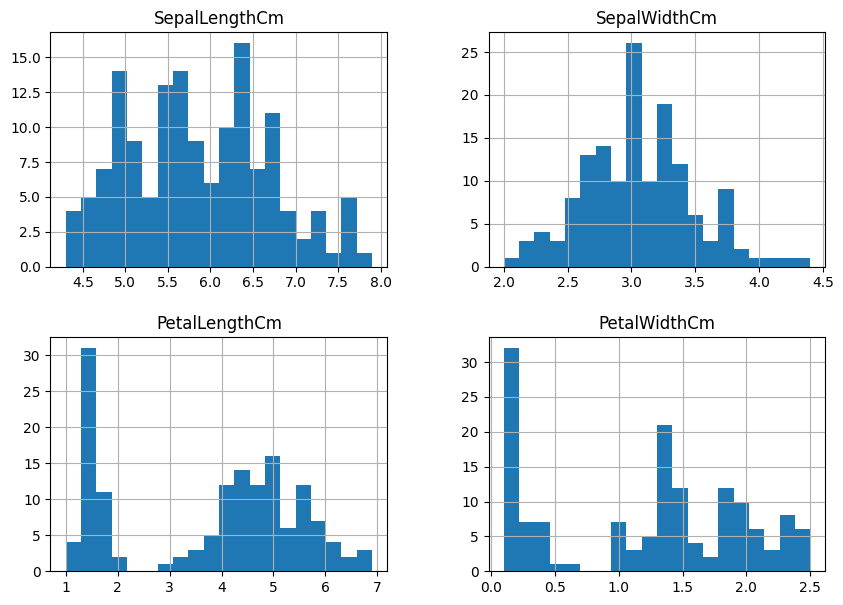

In [64]:
df_new.hist(bins=20, figsize=(10, 7))
plt.show()

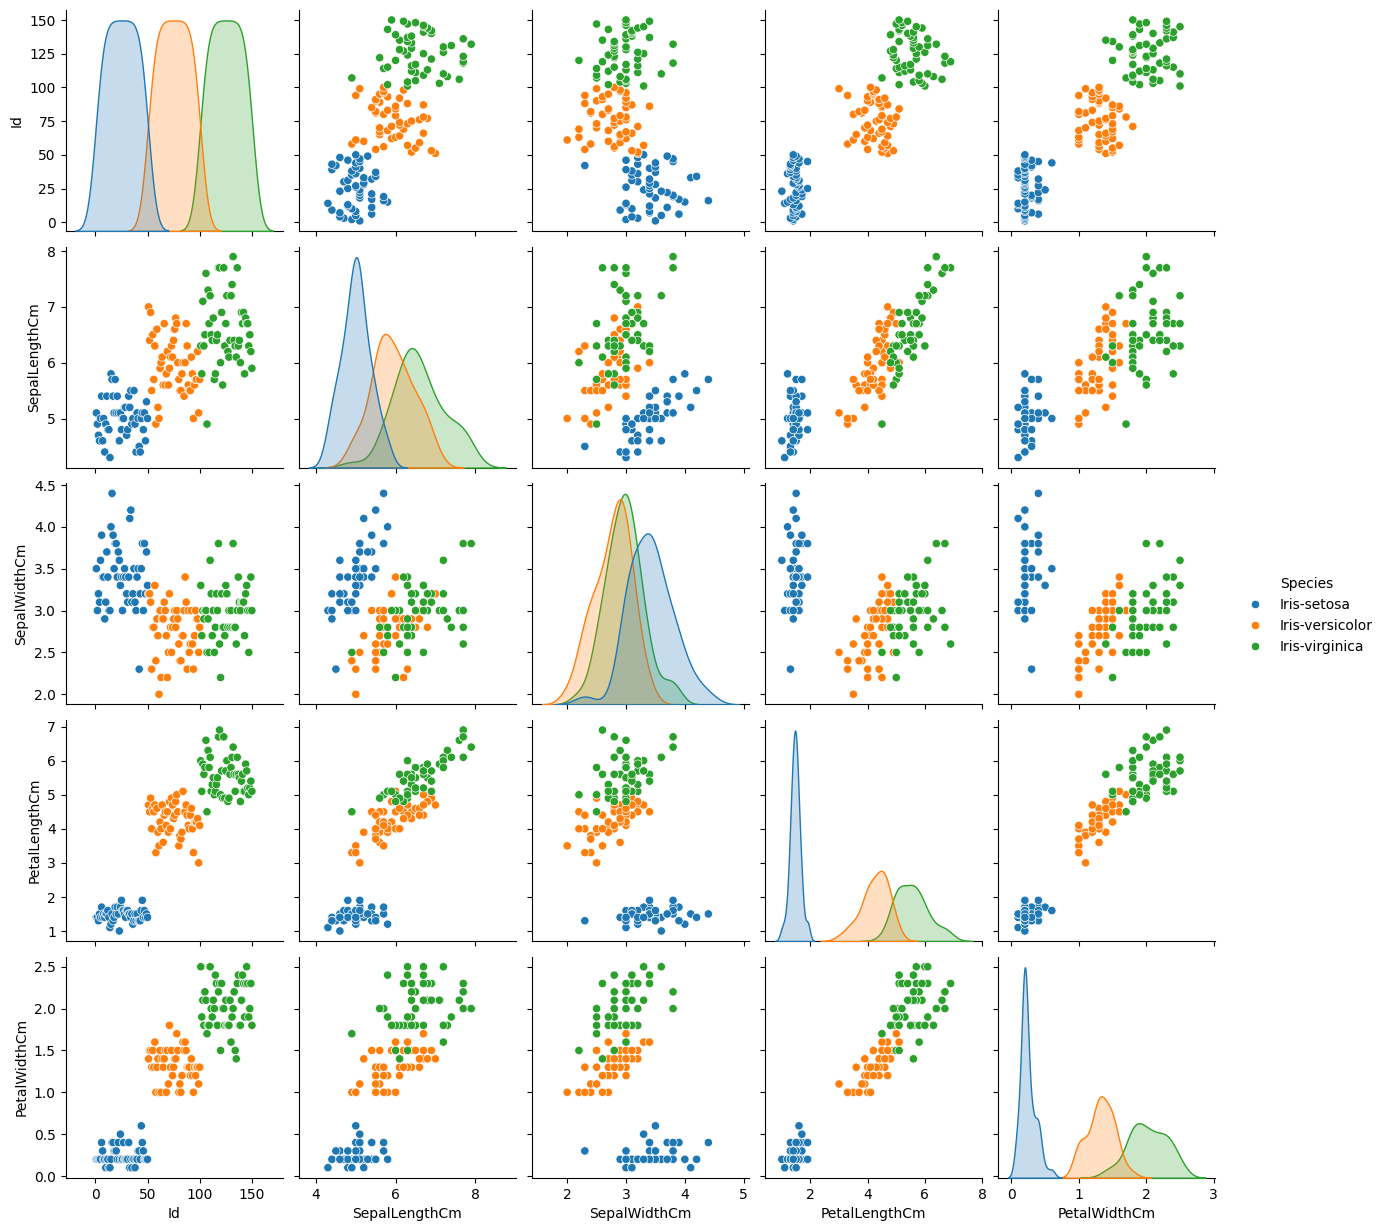

In [65]:
sns.pairplot(df,hue ="Species")
plt.show()

Are there any interesting relationships or correlations between different variables in the
dataset?

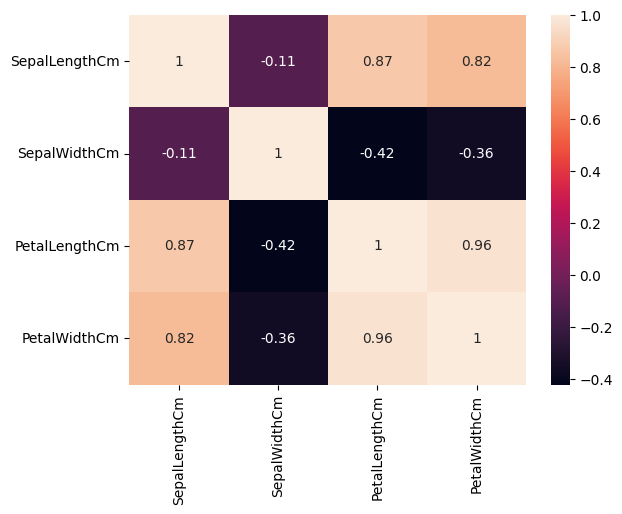

In [66]:
corr_matrix = df_new.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [67]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

Can you group the data by a categorical column and compute summary statistics for each
group?

In [68]:
grouped = df.groupby('Species')
print(grouped.mean())

                    Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  \
Species                                                              
Iris-setosa       25.5          5.006         3.418          1.464   
Iris-versicolor   75.5          5.936         2.770          4.260   
Iris-virginica   125.5          6.588         2.974          5.552   

                 PetalWidthCm  
Species                        
Iris-setosa             0.244  
Iris-versicolor         1.326  
Iris-virginica          2.026  


Can you perform any advanced analysis, such as time series analysis, regression modeling, or
machine learning?


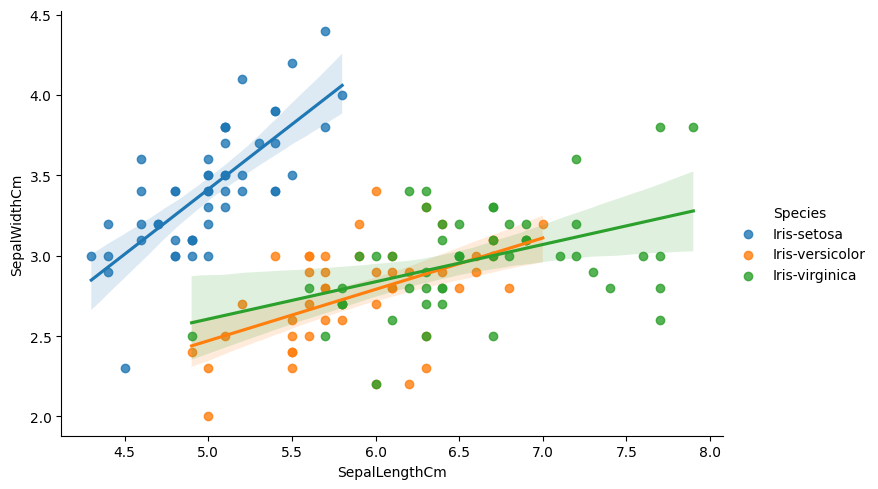

In [69]:
sns.lmplot(x='SepalLengthCm', y='SepalWidthCm', data=df, hue='Species', aspect=1.5)
plt.show()

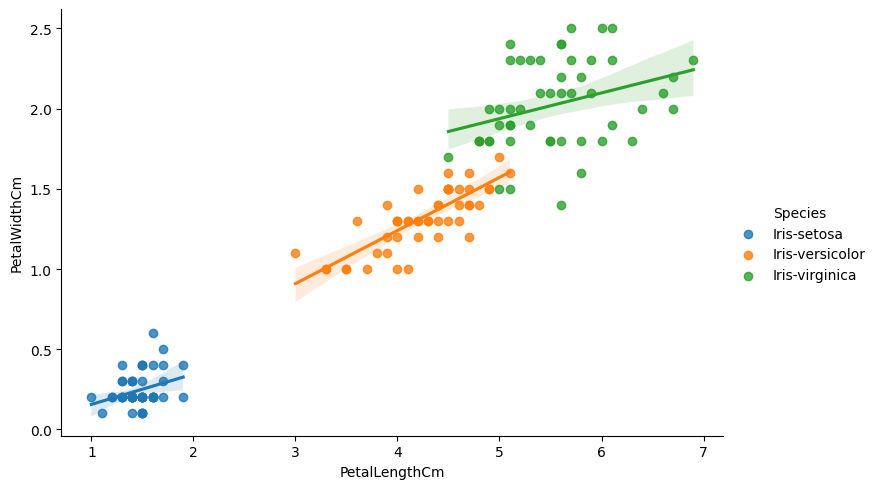

In [70]:
sns.lmplot(x='PetalLengthCm', y='PetalWidthCm', data=df, hue='Species', aspect=1.5)
plt.show()

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

if 'Id' in df.columns:
    df.drop('Id', axis=1, inplace=True)

Encode categorical class labels

In [72]:
label_encoder = LabelEncoder()
df['Species'] = label_encoder.fit_transform(df['Species'])

Split data into features and labels

In [73]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

Split dataset into training and test sets

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Create KNN classifier

In [75]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

knn = KNeighborsClassifier(n_neighbors=3)
# Fit the classifier to the data
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

Predict on test data

In [76]:
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred)) # Print classification report and accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Accuracy: 1.0


Advanced Visualization

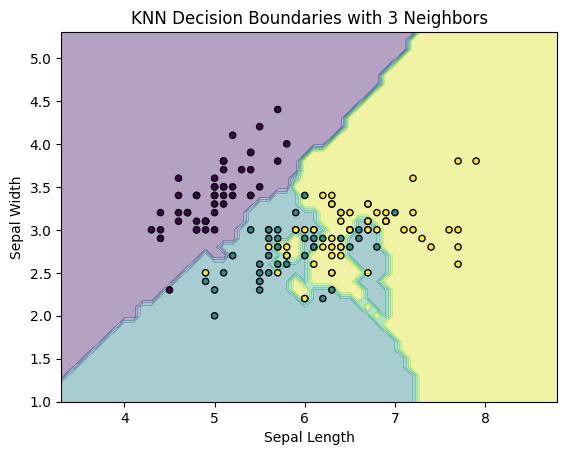

In [88]:
# Train a new model on two features for visualization
knn_2d = KNeighborsClassifier(n_neighbors=5)
knn_2d.fit(X_train[:, :2], y_train)  # Using only sepal length and sepal width
# Create a mesh grid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
# Predict classifications for each point in the mesh
Z = knn_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
plt.title('KNN Decision Boundaries with 3 Neighbors')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()